## 10. 階層的クラスタリング
プロトタイプベースのクラスタリングであり、**樹形図(dendrogram)**をプロットできるという特徴がある。  
階層的クラスタリングには、**凝集型**と**分割型**があるが、ここでは凝集型を説明する。  
個々のデータ点を1つのクラスタとして扱い、クラスタが1つだけ残った状態になるまで、最も近くにある2つのクラスタをマージしていく。  
  
凝集型階層的クラスタリングには、**単連結法**と**完全連結法**がある。  
単連結法では、クラスタのペアごとに最も類似度の高いメンバーどうしの距離を計算し、距離が最小になるように2つのクラスタをマージする。  
完全連結法では、最も類似度の低いメンバーを比較する。  
完全連結法の手順を示す。
1. すべてのデータ点の距離行列を計算する
2. 各データ点を単一のクラスタと見なして表現する
3. 最も類似度の低い(最も離れた)メンバーの距離に基づき、2つの最も低いクラスタをマージする
4. 距離行列を更新する
5. クラスタが1つだけ残った状態になるまで、手順3～4を繰り返す

In [1]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

iris = datasets.load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X_std = scaler.fit_transform(X)
df = pd.DataFrame(X_std, columns=iris.feature_names)
_, df = train_test_split(df)
df = df.reset_index(drop=True)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,2.249683,-0.592373,1.672157,1.053935
1,-0.779513,2.400185,-1.283389,-1.447076
2,-0.052506,-0.822570,0.762758,0.922303
3,-0.052506,-1.052767,0.137547,0.000878
4,-1.264185,0.788808,-1.226552,-1.315444


In [2]:
from scipy.spatial.distance import pdist, squareform

row_dist = pd.DataFrame(squareform(pdist(df[:5], metric='euclidean')), columns=df[:5].index, index=df[:5].index)
row_dist

,0,1,2,3,4
0,0.000000,5.755150,2.489458,2.995997,5.317086
1,5.755150,0.000000,4.551414,4.070263,1.688787
2,2.489458,4.551414,0.000000,1.137060,3.609649
3,2.995997,4.070263,1.137060,0.000000,2.907409
4,5.317086,1.688787,3.609649,2.907409,0.000000


In [28]:
from scipy.cluster.hierarchy import linkage

row_clusters = linkage(df.values, method='complete', metric='euclidean')

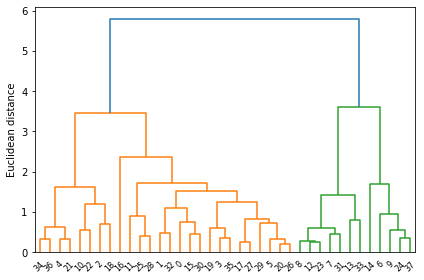

In [29]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

row_dendr = dendrogram(row_clusters,
                       labels=df.index)

plt.ylabel('Euclidean distance')
plt.tight_layout()
plt.show()

<ipython-input-113-396552624239>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  axm.set_xticklabels([''] + list(df_rowclust.columns), rotation =30, ha = 'left')


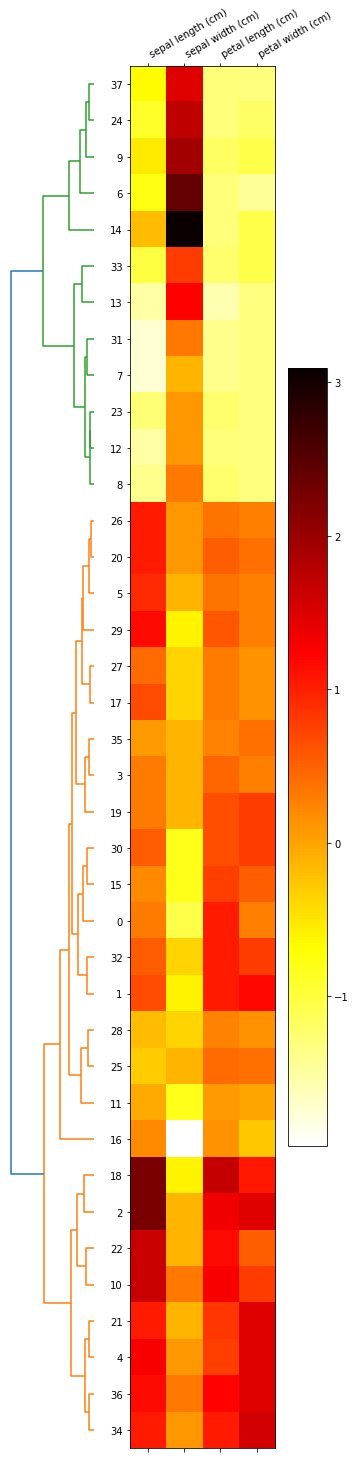

In [113]:
import numpy as np

fig = plt.figure(figsize=(6,32), facecolor='white')
axd = fig.add_axes([0.09, 0.1, 0.2, 0.6])

row_dendr = dendrogram(row_clusters, orientation='left')
df_rowclust = df.iloc[row_dendr['leaves'][::-1]]

axm = fig.add_axes([0.23, 0.1, 0.6, 0.6])
cax = axm.matshow(df_rowclust, interpolation='nearest', cmap='hot_r')

axd.set_xticks([])
axd.set_yticks([])
for i in axd.spines.values():
    i.set_visible(False)
fig.colorbar(cax)
ticks=np.arange(0, 38)
axm.set_yticks(ticks)
axm.set_xticklabels([''] + list(df_rowclust.columns), rotation =30, ha = 'left')
axm.set_yticklabels(list(df_rowclust.index))
plt.show()

schikit-learnによる凝集型階層的クラスタリング

In [116]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=3,
                             affinity='euclidean',
                             linkage='complete')
labels = ac.fit_predict(X_std)

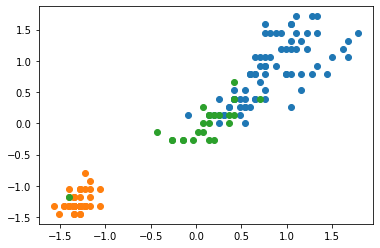

In [118]:
for i in np.unique(labels):
    plt.scatter(X_std[labels==i,2], X_std[labels==i,3]);